# Research on advanced placement Computer science Principles: Searching for equity in a two tiered solution to under representation
# (Quantitative Data Analysis)

In [2]:
# unzipping data file
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [168]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [169]:
# Loading data files
Exams = pd.read_csv('exams.csv')
Students = pd.read_csv('students.csv')

In [170]:
# Data info about Exams
print(Exams.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Exam Subject                                 259 non-null    object 
 1   Score                                        259 non-null    object 
 2   Students (11th Grade)                        259 non-null    float64
 3   Students (12th Grade)                        259 non-null    float64
 4   Students (Male)                              259 non-null    float64
 5   Students (Female)                            259 non-null    float64
 6   Students (White)                             259 non-null    float64
 7   Students (Black)                             259 non-null    object 
 8   Students (Hispanic/Latino)                   259 non-null    float64
 9   Students (Asian)                             259 non-null    float64
 10  St

In [171]:
# Data info about Students
print(Students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Exam Subject                                 39 non-null     object 
 1   Schools                                      37 non-null     float64
 2   Students (9th Grade)                         39 non-null     int64  
 3   Students (10th Grade)                        39 non-null     int64  
 4   Students (11th Grade)                        39 non-null     int64  
 5   Students (12th Grade)                        39 non-null     int64  
 6   Students (Not High School)                   39 non-null     int64  
 7   Students (> 9th Grade)                       39 non-null     int64  
 8   Students (Grade Not Known)                   39 non-null     int64  
 9   Students (Male)                              39 non-null     int64  
 10  Stud

In [172]:
# Printing First few rows about Exams
Exams.head()

,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016)
0,ART HISTORY,5,897.0,1260.0,815.0,1889.0,1631.0,34,321.0,514.0,5,5,154.0,2704.0
1,ART HISTORY,4,1835.0,2608.0,1800.0,3787.0,3290.0,132,918.0,877.0,13,8,273.0,5587.0
2,ART HISTORY,3,2311.0,3282.0,2283.0,4657.0,3898.0,287,1347.0,992.0,19,10,307.0,6940.0
3,ART HISTORY,2,2252.0,3248.0,2374.0,4494.0,3211.0,450,1972.0,809.0,15,21,280.0,6868.0
4,ART HISTORY,1,901.0,1352.0,1072.0,1699.0,942.0,307,1074.0,292.0,13,10,87.0,2771.0


In [173]:
# Printing First few rows about Students
Students.head()

,Exam Subject,Schools,Students (9th Grade),Students (10th Grade),Students (11th Grade),Students (12th Grade),Students (Not High School),Students (> 9th Grade),Students (Grade Not Known),Students (Male),...,Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),Students (Other Race),Students (Race Not Known),All Students (2015),All Students (2016),% Change 2015-2016,Colleges
0,ART HISTORY,2054.0,345,4252,8420,12097,14,1,394,8531,...,3484,65,54,1101,34,318,23314.0,25523,9,1239.0
1,BIOLOGY,11170.0,3995,32208,90509,108072,151,37,3108,93050,...,39395,683,344,9873,231,2923,223479.0,238080,7,2775.0
2,CALCULUS AB,14368.0,727,7651,83254,212023,910,98,3552,156673,...,49419,721,451,11395,396,2888,302532.0,308215,2,3012.0
3,CALCULUS BC,7418.0,451,4483,35233,82863,583,62,1256,72333,...,31893,162,131,4700,244,1057,118707.0,124931,5,1914.0
4,CHEMISTRY,9233.0,338,13940,85519,51785,402,24,1457,77370,...,32106,365,197,5997,142,1551,152745.0,153465,0,2383.0


In [174]:
# Printing last few rows about Exams
Exams.tail()

,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016)
254,WORLD HISTORY,3,6545.00,2420.00,39591.00,42884.0,45861.00,4517,14432.0,12251.00,232,142,4002.00,82475.0
255,WORLD HISTORY,2,5339.00,1994.00,33795.00,47281.0,37512.00,7133,21994.0,8844.00,319,187,3847.00,81076.0
256,WORLD HISTORY,1,2863.00,1452.00,21091.00,34966.0,15426.00,9429,23501.0,3629.00,337,181,2268.00,56057.0
257,WORLD HISTORY,All,20642.00,8204.00,125991.00,155455.0,134519.00,23017,66826.0,37977.00,981,589,13176.00,281446.0
258,WORLD HISTORY,Average,2.84,2.78,2.72,2.5,2.84,1.97,2.1,3.05,2.1,2.23,2.66,2.6


In [175]:
# Printing last few rows about Students
Students.tail()

,Exam Subject,Schools,Students (9th Grade),Students (10th Grade),Students (11th Grade),Students (12th Grade),Students (Not High School),Students (> 9th Grade),Students (Grade Not Known),Students (Male),...,Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),Students (Other Race),Students (Race Not Known),All Students (2015),All Students (2016),% Change 2015-2016,Colleges
34,STUDIO ART: 3-D DESIGN,1510.0,14,118,829,3757,4,0,329,1328,...,2245,44,32,771,40,437,4590.0,5051,10,820.0
35,U.S. HISTORY,13163.0,3385,59890,403216,15764,67,63,6906,225124,...,56148,1614,826,21178,307,6673,469689.0,489291,4,3042.0
36,WORLD HISTORY,7154.0,20666,228091,21521,9002,43,842,5186,127814,...,37977,981,589,13176,83,4278,265308.0,285351,8,2341.0
37,ALL SUBJECTS (EXAMS),NaN,177243,626730,1811608,2006854,5888,6917,69740,2122383,...,648158,13003,7380,188731,5294,56959,4478936.0,4704980,5,NaN
38,ALL SUBJECTS (STUDENTS),NaN,166953,509759,947479,932345,2523,6701,45412,1142205,...,295180,8345,4469,106083,2142,37429,2483452.0,2611172,5,NaN


In [176]:
# Descriptive Statistics about Exams
Exams.describe()

,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Hispanic/Latino),Students (Asian),Students (Two or More Races),All Students (2016)
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,13583.143900,14945.659151,15816.890386,19390.718378,18379.216139,7466.237375,5005.560695,1457.823745,35207.176680
std,43363.692482,34608.459736,29967.941274,40899.758316,37474.268183,16272.354362,9085.848334,2999.317401,70104.368028
min,2.260000,2.260000,2.490000,1.990000,2.510000,1.660000,1.000000,2.370000,2.290000
25%,229.500000,565.000000,402.000000,564.500000,402.000000,124.500000,98.000000,40.500000,1020.500000
50%,2021.000000,3282.000000,4006.000000,3596.000000,3898.000000,1074.000000,1459.000000,305.000000,7556.000000
75%,8178.000000,14486.000000,17464.500000,20358.000000,19769.000000,6222.500000,5472.500000,1619.500000,39869.500000
max,466057.000000,341254.000000,223127.000000,337730.000000,285273.000000,118290.000000,57811.000000,23826.000000,539357.000000


In [177]:
# Descriptive Statistics about Students
Students.describe()

,Schools,Students (9th Grade),Students (10th Grade),Students (11th Grade),Students (12th Grade),Students (Not High School),Students (> 9th Grade),Students (Grade Not Known),Students (Male),Students (Female),...,Students (Black),Students (Hispanic/Latino),Students (Asian),Students (Two or More Races),Students (Other Race),Students (Race Not Known),All Students (2015),All Students (2016),% Change 2015-2016,Colleges
count,37.000000,39.000000,39.000000,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,3.900000e+01,3.900000e+01,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.800000e+01,3.900000e+01,39.000000,37.000000
mean,5327.918919,13370.230769,45210.743590,1.171973e+05,1.268219e+05,366.641026,526.538462,4740.820513,1.381275e+05,1.701067e+05,...,19796.923077,64154.589744,40807.589744,12398.589744,326.410256,3880.692308,3.010875e+05,3.082342e+05,8.794872,1754.972973
std,4131.765976,41773.856716,129650.706852,3.280392e+05,3.472798e+05,1010.473247,1677.339087,12913.244555,3.741683e+05,4.629425e+05,...,54292.427291,174830.042550,110598.329010,33722.289151,890.758628,10595.690624,8.058138e+05,8.366542e+05,21.254324,917.248678
min,136.000000,0.000000,97.000000,3.900000e+02,7.990000e+02,0.000000,0.000000,38.000000,1.014000e+03,1.402000e+03,...,41.000000,143.000000,131.000000,63.000000,1.000000,25.000000,2.431000e+03,2.481000e+03,-3.000000,329.000000
25%,1876.000000,101.500000,1172.500000,4.969500e+03,1.074250e+04,9.000000,6.000000,305.500000,7.411500e+03,8.378500e+03,...,813.500000,2770.500000,2575.000000,812.000000,32.500000,282.500000,2.074150e+04,2.048600e+04,2.000000,1118.000000
50%,4510.000000,451.000000,4483.000000,1.500300e+04,2.074300e+04,52.000000,24.000000,1256.000000,4.732700e+04,3.506100e+04,...,2429.000000,12042.000000,14187.000000,2415.000000,83.000000,830.000000,9.283750e+04,8.238800e+04,5.000000,1843.000000
75%,7567.000000,1623.000000,20052.500000,5.533550e+04,8.004650e+04,195.000000,66.500000,3329.000000,9.985500e+04,1.264475e+05,...,15389.000000,45374.500000,34335.500000,9092.500000,242.000000,2852.500000,2.164908e+05,2.223215e+05,8.000000,2383.000000
max,14368.000000,177243.000000,626730.000000,1.811608e+06,2.006854e+06,5888.000000,6917.000000,69740.000000,2.122383e+06,2.582597e+06,...,292866.000000,966831.000000,648158.000000,188731.000000,5294.000000,56959.000000,4.478936e+06,4.704980e+06,133.000000,3315.000000


In [178]:
# Null values Data about Exams
print(Exams.isnull().sum())

Exam Subject                                   0
Score                                          0
Students (11th Grade)                          0
Students (12th Grade)                          0
Students (Male)                                0
Students (Female)                              0
Students (White)                               0
Students (Black)                               0
Students (Hispanic/Latino)                     0
Students (Asian)                               0
Students (American Indian/Alaska Native)       9
Students (Native Hawaiian/Pacific Islander)    7
Students (Two or More Races)                   0
All Students (2016)                            0
dtype: int64


In [179]:
# Null values Data about Students
print(Students.isnull().sum())

Exam Subject                                   0
Schools                                        2
Students (9th Grade)                           0
Students (10th Grade)                          0
Students (11th Grade)                          0
Students (12th Grade)                          0
Students (Not High School)                     0
Students (> 9th Grade)                         0
Students (Grade Not Known)                     0
Students (Male)                                0
Students (Female)                              0
Students (White)                               0
Students (Black)                               0
Students (Hispanic/Latino)                     0
Students (Asian)                               0
Students (American Indian/Alaska Native)       0
Students (Native Hawaiian/Pacific Islander)    0
Students (Two or More Races)                   0
Students (Other Race)                          0
Students (Race Not Known)                      0
All Students (2015) 

In [180]:
# Handling missing values
Students.fillna(0, inplace=True)
Exams.fillna(0, inplace=True)

In [181]:
# Data columns of Exams
print(Exams.columns)

Index(['Exam Subject', 'Score', 'Students (11th Grade)',
       'Students (12th Grade)', 'Students (Male)', 'Students (Female)',
       'Students (White)', 'Students (Black)', 'Students (Hispanic/Latino)',
       'Students (Asian)', 'Students (American Indian/Alaska Native)',
       'Students (Native Hawaiian/Pacific Islander)',
       'Students (Two or More Races)', 'All Students (2016)'],
      dtype='object')


In [182]:
# Data columns of Students
print(Students.columns)

Index(['Exam Subject', 'Schools', 'Students (9th Grade)',
       'Students (10th Grade)', 'Students (11th Grade)',
       'Students (12th Grade)', 'Students (Not High School)',
       'Students (> 9th Grade)', 'Students (Grade Not Known)',
       'Students (Male)', 'Students (Female)', 'Students (White)',
       'Students (Black)', 'Students (Hispanic/Latino)', 'Students (Asian)',
       'Students (American Indian/Alaska Native)',
       'Students (Native Hawaiian/Pacific Islander)',
       'Students (Two or More Races)', 'Students (Other Race)',
       'Students (Race Not Known)', 'All Students (2015)',
       'All Students (2016)', '% Change 2015-2016', 'Colleges'],
      dtype='object')


In [183]:
# Printing the Numerical Data columns
ExamsNumCol = Exams.select_dtypes(include=['float', 'int']).columns
print("Numerical columns in Exams:", ExamsNumCol)
StudentsNumCol = Students.select_dtypes(include=['float', 'int']).columns
print("\nNumerical columns in Students:", StudentsNumCol)

Numerical columns in Exams: Index(['Students (11th Grade)', 'Students (12th Grade)', 'Students (Male)',
       'Students (Female)', 'Students (White)', 'Students (Hispanic/Latino)',
       'Students (Asian)', 'Students (Two or More Races)',
       'All Students (2016)'],
      dtype='object')

Numerical columns in Students: Index(['Schools', 'Students (9th Grade)', 'Students (10th Grade)',
       'Students (11th Grade)', 'Students (12th Grade)',
       'Students (Not High School)', 'Students (> 9th Grade)',
       'Students (Grade Not Known)', 'Students (Male)', 'Students (Female)',
       'Students (White)', 'Students (Black)', 'Students (Hispanic/Latino)',
       'Students (Asian)', 'Students (Two or More Races)',
       'Students (Other Race)', 'Students (Race Not Known)',
       'All Students (2015)', 'All Students (2016)', '% Change 2015-2016',
       'Colleges'],
      dtype='object')


In [184]:
# Printing the Categorical columns
ExamsCatCol = Exams.select_dtypes(include=['object']).columns
print("Categorical columns in Exams:", ExamsCatCol)
StudentsCatCol = Students.select_dtypes(include=['object']).columns
print("\nCategorical columns in Students:", StudentsCatCol)

Categorical columns in Exams: Index(['Exam Subject', 'Score', 'Students (Black)',
       'Students (American Indian/Alaska Native)',
       'Students (Native Hawaiian/Pacific Islander)'],
      dtype='object')

Categorical columns in Students: Index(['Exam Subject', 'Students (American Indian/Alaska Native)',
       'Students (Native Hawaiian/Pacific Islander)'],
      dtype='object')


In [185]:
# Converting columns into another data types
Students['Exam Subject'] = Students['Exam Subject'].astype(str)
Exams['Exam Subject'] = Exams['Exam Subject'].astype(str)

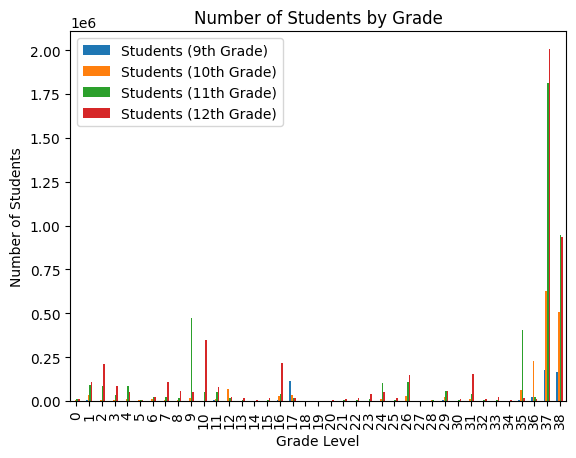

In [186]:
# Plotting total students by grade
grades = ['Students (9th Grade)', 'Students (10th Grade)', 'Students (11th Grade)', 'Students (12th Grade)']
Students[grades].plot(kind='bar')
plt.xlabel('Grade Level')
plt.ylabel('Number of Students')
plt.title('Number of Students by Grade')
plt.show()

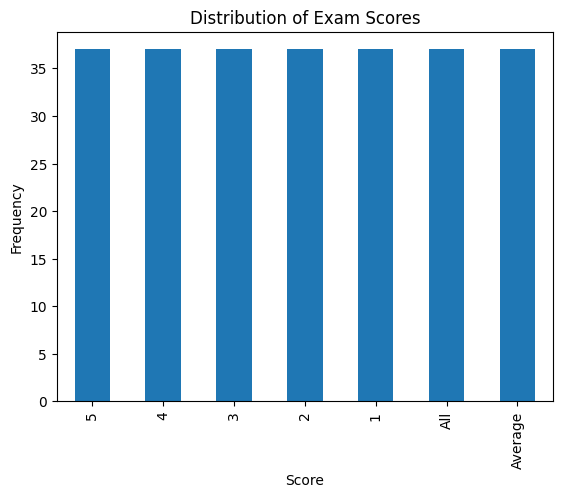

In [187]:
# Plotting scores distribution
Exams['Score'].value_counts().plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')
plt.show()

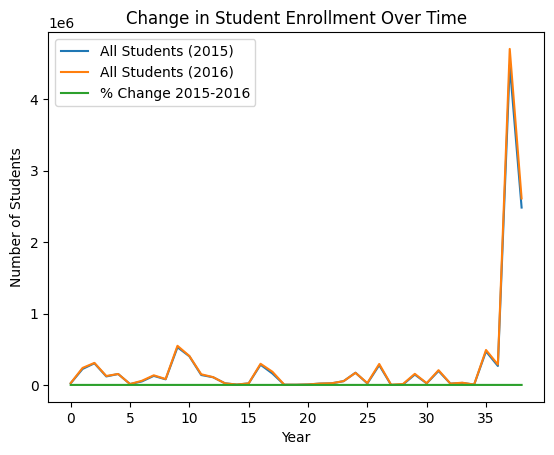

In [188]:
# If the dataset includes time-series data
Students[['All Students (2015)', 'All Students (2016)', '% Change 2015-2016']].plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('Change in Student Enrollment Over Time')
plt.show()

# Performing Chi-Square Test

In [189]:
ContingencyTable = pd.crosstab(Students['Exam Subject'], Students['Students (Male)'])
chiStats, p_val, dof, ex = chi2_contingency(ContingencyTable)
print(f"Chi-Square Statistic: {chiStats}, P-value: {p_val}")

Chi-Square Statistic: 1482.0000000000007, P-value: 0.23780643207804017


# Performing oneway Anova Testing

In [190]:
# Converting columns to numeric
Numcolumns = ['Students (11th Grade)', 'Students (12th Grade)', 'Students (Male)',
                'Students (Female)', 'Students (White)', 'Students (Black)',
                'Students (Hispanic/Latino)', 'Students (Asian)',
                'Students (American Indian/Alaska Native)',
                'Students (Native Hawaiian/Pacific Islander)',
                'Students (Two or More Races)', 'All Students (2016)', 'Score']
for col in Numcolumns:
    Exams[col] = pd.to_numeric(Exams[col], errors='coerce')

In [191]:
# Checking the data type
print(Exams.dtypes)

Exam Subject                                    object
Score                                          float64
Students (11th Grade)                          float64
Students (12th Grade)                          float64
Students (Male)                                float64
Students (Female)                              float64
Students (White)                               float64
Students (Black)                               float64
Students (Hispanic/Latino)                     float64
Students (Asian)                               float64
Students (American Indian/Alaska Native)       float64
Students (Native Hawaiian/Pacific Islander)    float64
Students (Two or More Races)                   float64
All Students (2016)                            float64
dtype: object


In [193]:
# Checking null values in exams
print(Exams.isnull().sum())

Exam Subject                                    0
Score                                          74
Students (11th Grade)                           0
Students (12th Grade)                           0
Students (Male)                                 0
Students (Female)                               0
Students (White)                                0
Students (Black)                                1
Students (Hispanic/Latino)                      0
Students (Asian)                                0
Students (American Indian/Alaska Native)       12
Students (Native Hawaiian/Pacific Islander)    20
Students (Two or More Races)                    0
All Students (2016)                             0
dtype: int64


In [194]:
# Removing null values
Exams = Exams.dropna(subset=['Score', 'Students (American Indian/Alaska Native)', 'Students (Native Hawaiian/Pacific Islander)', 'Students (Black)'])

In [195]:
# Grouping scores by different racial categories
Whites = Exams[Exams['Students (White)'] > 0]['Score'].dropna()
Blacks = Exams[Exams['Students (Black)'] > 0]['Score'].dropna()
Hispanics = Exams[Exams['Students (Hispanic/Latino)'] > 0]['Score'].dropna()

In [196]:
# Printing the results of ANOVA testing
f_stat, p_val = f_oneway(Whites, Blacks, Hispanics)
print(f"F-Statistic: {f_stat}, P-value: {p_val}")

F-Statistic: 2.7375632593070626e-31, P-value: 1.0


# Performing Modelling

In [197]:
# Setting features and targetted variable
features = Students[['Students (9th Grade)', 'Students (10th Grade)',
                        'Students (11th Grade)', 'Students (12th Grade)',
                        'Students (Male)', 'Students (Female)',
                        'Students (White)', 'Students (Black)',
                        'Students (Hispanic/Latino)', 'Students (Asian)',
                        'Students (American Indian/Alaska Native)',
                        'Students (Native Hawaiian/Pacific Islander)',
                        'Students (Two or More Races)']]

target = Students['All Students (2016)']

In [198]:
# Removing null values
features = features.fillna(0)
target = target.fillna(0)

In [199]:
# trainig a Linear regression model
model = LinearRegression()

In [200]:
# Converting features and target to numeric
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)
target = target.apply(pd.to_numeric, errors='coerce').fillna(0)

In [201]:
# Fitting a Linear regression model
model.fit(features, target)

LinearRegression()

In [203]:
# Printing model's coefficients
print("Coefficients:", model.coef_)
print("\nIntercept:", model.intercept_)

Coefficients: [ 1.86486387e-14  1.22124533e-14  1.32116540e-14  1.30451205e-14
  1.00000000e+00  1.00000000e+00  1.94289029e-16 -3.53883589e-16
  1.33226763e-15 -1.70696790e-15 -3.85183638e-13  4.89208066e-13
  7.99360578e-15]

Intercept: 1.1641532182693481e-10
